Suppose they are on the same line (which is ideal but impossible), and all angles are extremely small.

Geometry implies:

$$b = \theta_E D_L $$

$$\alpha = \theta_E \dfrac{D_S}{D_{LS}}$$


Once we establish an extra connection between $\alpha$ and $b$, we will natually solve for $\theta_E$. Now what is that connection?

To get a sense of the dependencies, we take the Newtonian limit, and suppose an object of mass $m$ and initial velocity $v$ passes close to the lens with smallest distance $b$. Through momentum conservation, we know that the deviated speed $\sim \alpha v$ can be expressed in

$$\alpha m v \sim F_g t_g$$

Where $F_g$ is a kind of effective gravity pull in the deviation direction, and $t_g$ is its effective timescale. Now we know that we only need to count the time when the object is close to the lens where gravity is large, so a good approximation here is 

$$F_g \approx \dfrac{GMm}{b^2}, t_g \approx \dfrac bv$$

And so $m$ cancels out, leaving $$\alpha \approx \dfrac{GM}{bv^2}$$

The approximate sign means although we have made some fine approximations instead of actually integrating the momentum equation through trajectory, we are pretty confident that the accurate result is going to be within a factor of unity. In fact, Soldner (1801) already integrated out the accurate result:

$$\alpha = \frac{2 G M}{b v^2}$$

Taking limit of $m \rightarrow 0, v \rightarrow c$, we just need to replace $v$ with $c$ for the photon limit. In fact this is what Einstein got with special relativity in 1911. 

When people remind him of Soldner's derivation a hundred years ago, he said, "I have no idea. Of course I derived it myself."

Then in 1915, correcting for the distortion of gravitational field in General relativity, he got

$$\alpha=\frac{4 G M}{b c^2}$$

Which now he can safely claim is his own derivation, and that's exactly what helps to differentiate/prove General relativity in Eddington's observation (1919)

(Although some "German-school" physicists like Lenard are trying to discredit Einstein (as "Jewish-school" physicist) through continuously making a fuss of the 1801 paper and saying this is still Soldner's credit)

************************************

Jan 27th: Basic idea of what a microlensing light-curve looks like, and the "peak magnification" as a function of xBH

Now that you have read https://en.wikipedia.org/wiki/Einstein_radius, you should understand the general expression for the location (separation angle) of the two images on the lens plane $\theta_1, \theta_2$, as a function of the separation on the source plane $\theta_S$.

Apparently, when $\theta_S=0$, source is directly behind the lens, so only one solution $\theta_{1,2} = \theta_E$, as we have discussed before.

Normalize these general equations by $\theta_E$, and you will have

$$x_{BH,1} = u + \dfrac{1}{x_{BH,1}}$$

$$x_{BH,2} = -u + \dfrac{1}{x_{BH,2}}$$

Where $u = \theta_S/\theta_E$ is called the impact parameter

These quadratic equations have simple roots:

$$x_{BH,1} = 0.5[(u^2 + 4)^{1/2}+u]>1$$

$$x_{BH,2} = 0.5[(u^2 + 4)^{1/2}-u]<1$$

What values do they approach when $u$ goes to infinity?

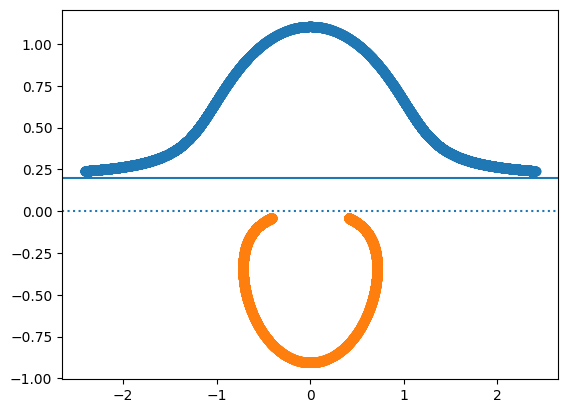

In [12]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import special as sp
from scipy import integrate

x_offset = np.linspace(-2,2,10000)

u_min = 0.2

plt.axhline(y=u_min)

plt.axhline(y=0,ls=":")

u = np.sqrt(u_min**2 + x_offset**2)

x_BH1 = 0.5*((u**2+4)**0.5+u)

x_BH2 = 0.5*((u**2+4)**0.5-u)

image_1_x = x_BH1*(x_offset/u)

image_1_y = x_BH1*(u_min/u)


image_2_x = -x_BH2*(x_offset/u)

image_2_y = -x_BH2*(u_min/u)


plt.scatter(image_1_x, image_1_y)

plt.scatter(image_2_x, image_2_y)


plt.savefig("figure_1.jpg")

Each of the image has a magnification of

$$A_i = |\dfrac{\theta_i d\theta_i}{\theta_S d\theta_S}| = |\dfrac{x_{BH,i}}{u}\dfrac{dx_{BH,i}}{du}|$$

Why is that? High school optics (https://byjus.com/physics/lens-formula/) tells you that a stick that extends from line of sight to some angle $\theta_S$ on the source plane will be magnified by $\theta_i/\theta_S$ if it now extends to $\theta_i$ on the lens plane.

But if that 1D stick is actually a 2D patch, then it's actually the side perpendicular to $\theta_S$ that will be magnified by that much, while the other side along $\theta_S$ will be elongated by $d\theta_i/d\theta_S$

This is because e.g. along the impact parameter suppose the object extends from $\theta_S$ to $\theta_S+\Delta \theta$, the object on the lens plane will extend, in the direction of $\theta_i$, from $\theta_i$ to

$$\theta_i + \Delta \theta \dfrac{d\theta_i}{d\theta_S}$$

Remember the Taylor expansion! And so the difference is what the actual size of the image will be, in the direction along $\theta_i$

Tedious calculation gives 

$$A_i = \dfrac12\dfrac{u^2 + 2}{u\sqrt{u^2+4}}\pm \dfrac12$$

substituting $u = |x_{BH}-\dfrac1{x_{BH}}|$, one can further verify $A = |1-x_{BH}^4|^{-1}$. We have applied this expression, but usually one can simply express the time evolution of $A$ through $u$, as the source passes the background with uniform speed:

$$u(t) = \sqrt{u_{\rm min}^2 + (\dfrac{t-t_0}{t_E})^2} \rightarrow A(t)$$

Where $t_E = \theta_E D/v$

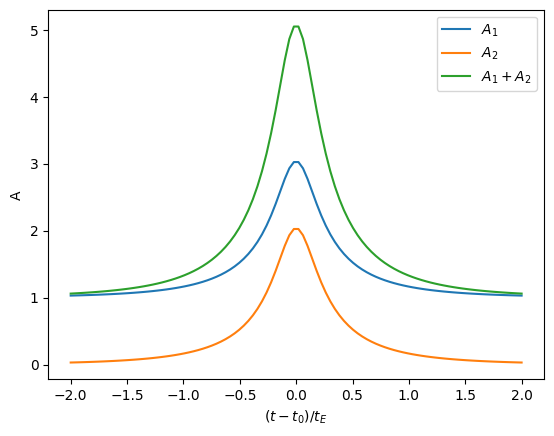

In [13]:
###generating array of normalized t###

umin = 0.2

tnorm = np.linspace(-2, 2, 100)

u = np.sqrt(umin**2 + tnorm**2)

A1 = 0.5*((u**2+2)/u/np.sqrt(u**2+4)+1)

A2 = 0.5*((u**2+2)/u/np.sqrt(u**2+4)-1)

plt.plot(tnorm, A1, label="$A_1$")

plt.plot(tnorm, A2, label="$A_2$")

plt.plot(tnorm, A1 + A2, label="$A_1 + A_2$")

plt.ylabel("A")

plt.xlabel("$(t-t_0)/t_E$")

plt.legend()



$$M(<r) = \int_{0}^r 4\pi \rho(r') r'^2 dr'$$

$$\Sigma(r) = \int_r^\infty \dfrac{\rho(r') r'}{\sqrt{r'^2-r^2}} dr'$$

Text(0, 0.5, 'Projected Surface Mass Density [$m_{\\odot}pc^{-2}$]')

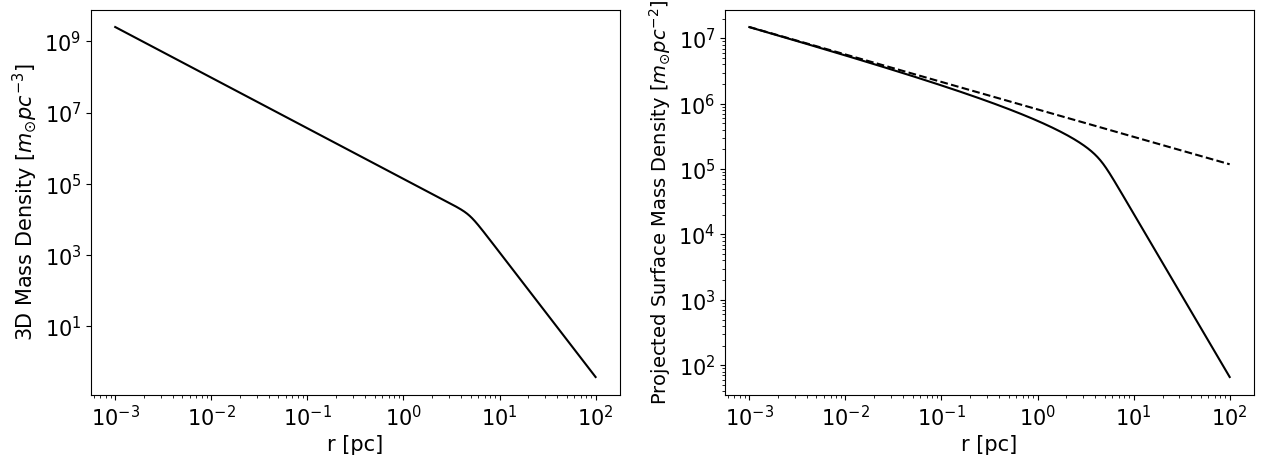

In [29]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import special as sp
from scipy import integrate


r = np.logspace(-3,2,1000) #distance to center from 0.001pc to 100 pc

rb=4.9
gamma_0=1.42
alpha=10
beta=3.5
n = 53

#Nuker model parameters from Gallego-Cano et al.

def density(t):
    return n*2**(beta/alpha-gamma_0/alpha)*(t/rb)**(-gamma_0)*(1+(t/rb)**alpha)**(gamma_0/alpha-beta/alpha) #nuker model

def mass_kermal(rp):
    return density(rp)*4*np.pi*rp**2


def sigma_kernel(rp,R):
    return density(rp)*rp/np.sqrt(rp**2-R**2)


n_core=density(r)

#generate density distribution


n = n*1.1e6/integrate.quad(mass_kermal, 0, 1)[0]

#important normalization! update n such that total mass within 1pc is 1.1e6 solar mass

sigma_core=[]

for i in r:
    sigma_core.append(2*integrate.quad(sigma_kernel, i, float("inf"), args=i)[0])
    
#generate surface density distribution

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(r, density(r), color="black")
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15) 
plt.ylabel("3D Mass Density"" [$m_{\odot}pc^{-3}$]",fontsize=15)

plt.subplot(122)
plt.plot(r, sigma_core,color="black")
plt.plot(r, 820000*r**(-0.42),color="black",ls="--") #an approximate fit to the distribution when r is small
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("r [pc]",fontsize=15)
plt.ylabel("Projected Surface Mass Density [$m_{\odot}pc^{-2}$]",fontsize=14)


In [6]:
n

12535.660937589799

Try to convert the surface density into what the code reads e.g.:

In [15]:
mstar = 1

M_SMBH = 4e6

epsilon = mstar/M_SMBH

Sigma = 820000*0.01**(-0.42)/(mstar)

Sigma #as a number density

5673013.961535279

Which means we can write in raw units, when $r$ is small, approximately:

$$\Sigma(r) = 5.67\times 10^6 {\rm pc}^{-2} (r/0.01{\rm pc})^{-0.42}$$

In [16]:
##1 arcsec = 0.039 pc in galactic center


Sigma_1 = Sigma*0.039**2

ctheta_1 = 0.01/0.039

print(Sigma_1,ctheta_1)

8628.65423549516 0.25641025641025644


Which means we can write alternatively

$$\Sigma(\theta) = 8628 {\rm arcsec}^{-2} (\theta/0.2564{\rm arcsec})^{-0.42}$$

In [17]:

theta_e = 2.02/np.sqrt(2) 

##theta_E = 2.02*sqrt(1-1/(1+ratio)), where ratio is the source-lens distance to observer-lens distance ratio, we take it to be ~1

Sigma_2 = Sigma_1*(epsilon*theta_e**2)

ctheta_2 = ctheta_1/theta_e

print(Sigma_2,ctheta_2)

0.004401045092814306 0.17951428819155818


$$\Sigma(x_{BH}) = 0.0044 (\epsilon \theta_E^2)^{-1} (x_{BH}/0.1795)^{-0.42}$$

This is what we read in the following code, where x\_BH is expressed as an image angle divided by theta\_E and area is expressed in $\epsilon \theta_E^2$

In reality, the mass of stars is not uniformly $M_{\odot}$, even if we have assumed a mean value of $\bar{m} \approx M_{\odot}$. Generally, if we have a normalized mass function of the stars $\int g(m)dm=1$ with relative fractions $g(m)$ not varying much in our relatively small integration range of typically $0.8\theta_E
\lesssim x_{\rm BH}\lesssim1.2\theta_{\rm E}$, then the optical depth of secondary lenses at a given separation from the primary image $x_{\rm BH}$ would be to sum up the surface density from each mass bin $\Sigma_*(x_{\rm BH})g(m)$ normalized from unit $[\mathrm{pc}^{-2}]$ to unit $[\epsilon(m) \theta^2_{\mathrm{E}}]^{-1}$ multiplied by the corresponding cross section, which always has the same value since it's normalized by default:

e.g. if everything has mass $m$, $\Sigma_* = \dfrac{\Sigma_m}{{m}}$

And $\Sigma_*[\epsilon \theta_E^2]\propto {\Sigma_*}{{m}}/M_{SMBH} \propto \Sigma_m/M_{SMBH} $ does not depend on ${m}$

For each $x_{BH}$, we have a fixed/calculated area of magnification $\sigma_*$ on the lens plane measured in $\epsilon \theta_E^2$

And so the final event count will only be proportional to $\Sigma_m/M_{SMBH} \sigma_*$

***************************************************************

If mass $m$ takes up $g(m)$ fraction, then  $\int g(m)dm=1$ and  $\int g(m) m dm=\overline{m}$

Then $\Sigma_m = \int \Sigma_{*,tot}g(m) m dm = \Sigma_{*,tot} \overline{m}$

For each of the mass, $\Sigma_*[\epsilon\theta_E^2] \propto \Sigma_{*}(m) m/M_{SMBH} = \Sigma_{*, tot} g(m) dm \times m/M_{SMBH} = \dfrac{\Sigma_m g(m) m dm}{\overline{m} M_{SMBH}}$

For each of the mass, we have a fixed/calculated area $\sigma_*$ independent of $m$

What matters in subsequent calculation is 

$$ \sum \Sigma_{*}[\epsilon \theta_E^2]^{-1} \times \sigma_*[\epsilon \theta_E^2] \propto \int \frac{\Sigma_m g(m) m dm}{\bar{m} M_{SMBH}} \sigma_*  $$

progress = 0.0
progress = 0.1
progress = 0.2
progress = 0.3
progress = 0.4
progress = 0.5
progress = 0.6
progress = 0.7
progress = 0.8
progress = 0.9


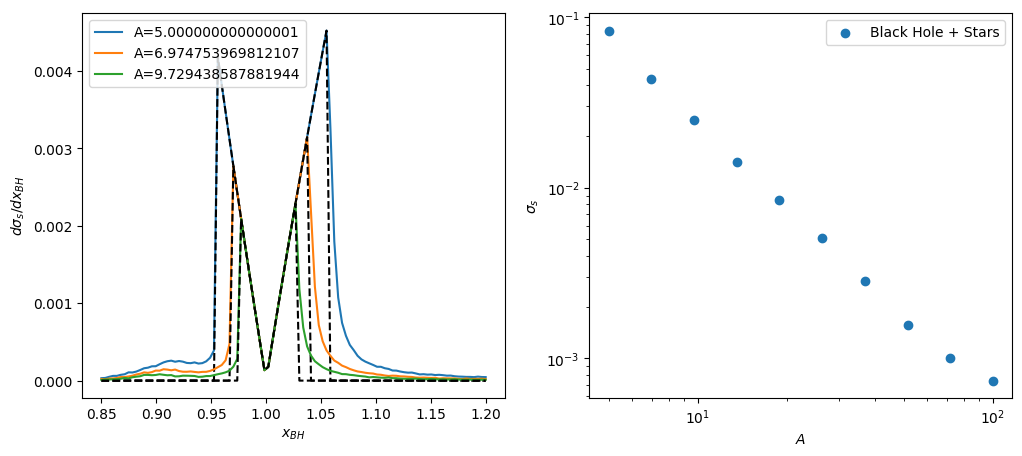

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random





Aslice = 10 #number of data points in A_threshold

xBHslice = 100 #number of data points in x_{BH}

x_BH=np.linspace(0.85,1.2,xBHslice) #unperturbed image distance

A_BH=abs(1-x_BH**(-4))**(-1)

Sigma=0.0044*(x_BH/0.1795)**(-0.42) #distribution of the stars




sigma=np.zeros(xBHslice)
dsigma=np.zeros(xBHslice)

delta=x_BH[1]-x_BH[0]
def step_function(x):
    return np.array(x > 0, dtype=int)

threshold=np.logspace(np.log10(5),np.log10(100),Aslice) #np.array([5,10,20,30,40,50,60,80,100])

dsigmaA = np.zeros((Aslice,xBHslice)) #record dSigmaA/dx as functions of both xBH and Ath
dsigmaABH = np.zeros((Aslice,xBHslice)) #record dSigmaA_BH/dx as functions of both xBH and Ath

sigmaA=np.zeros(Aslice) #record integrated SigmaA as function of Ath
sigmaABH=np.zeros(Aslice) #record integrated SigmaA_BH as function of Ath

for p in range(Aslice):
    print("progress = "+str(p/Aslice)) #progress bar
    A_th=threshold[p] #threshold
    G1=0
    G2=0
    for k in range(xBHslice):
        t=0
        gamma=x_BH[k]**(-2)
        for j in range(100000):  #10000 test points, can go to larger number for more accurate results
            x=-10+20*random.random()
            y=-10+20*random.random() #generate position
            coef3=(1-2*gamma)*x/gamma
            coef2=(1-gamma)**2*(x**2+y**2)/4/gamma**2-(1-gamma)*x**2/gamma-1/(1+gamma)
            coef1=-((1-gamma)**2*(x**2+y**2)*x/4/gamma**2+(1-gamma)*x/gamma/(1+gamma))
            coef0=-(1-gamma)**2*x**2/(4*gamma**2*(1+gamma))
            args=(1,coef3,coef2,coef1,coef0)
            ep=np.roots(args)
            eta=(1+gamma)*y*ep/(2*gamma*x+(1-gamma)*x)
            Am=abs(1-(gamma+(1+gamma)**2*ep**2-(1-gamma)**2*eta**2)**2-4*(1-gamma**2)**2*ep**2*eta**2)**(-1)
            for i in Am:
                if (np.imag(i)==0)&(A_th<abs(i)):
                    t+=1
                    #break two images above threshold=count twice
        sigma[k]=t/100000*20**2
        dsigmaA[p][k] = 2*np.pi*(min(sigma[k]*Sigma[k] + step_function(A_BH[k]-A_th),1))*A_BH[k]**(-1)*x_BH[k]*delta
        dsigmaABH[p][k] = 2*np.pi*(step_function(A_BH[k]-A_th))*A_BH[k]**(-1)*x_BH[k]*delta
        G1+=dsigmaA[p][k]
        G2+=dsigmaABH[p][k]
    sigmaA[p]=G1
    sigmaABH[p]=G2


plt.figure(figsize=(12,5))
plt.subplot(121)    

plt.plot(x_BH,dsigmaA[0],label="A="+str(threshold[0]))

plt.plot(x_BH,dsigmaABH[0],color="black",ls="--")

plt.plot(x_BH,dsigmaA[1],label="A="+str(threshold[1]))

plt.plot(x_BH,dsigmaABH[1],color="black",ls="--")

plt.plot(x_BH,dsigmaA[2],label="A="+str(threshold[2]))

plt.plot(x_BH,dsigmaABH[2],color="black",ls="--")

plt.ylabel("$d\sigma_s/dx_{BH}$")
plt.xlabel("$x_{BH}$")

plt.legend()

plt.subplot(122)    

plt.scatter(threshold, sigmaA,label="Black Hole + Stars")
#plt.scatter(threshold, sigmaABH, label="Black Hole", color="black")
plt.ylabel("$\sigma_s$")
plt.xlabel("$A$")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [19]:
np.savetxt("sigmaA.txt",sigmaA)
np.savetxt("sigmaABH.txt",sigmaABH)

In [20]:
from scipy.optimize import curve_fit

Aslice = 10 

threshold=np.logspace(np.log10(5),np.log10(100),Aslice)

sigmaA = np.loadtxt("sigmaA.txt")

def func(x, a, b):
    return np.log(a*(np.e**x)**b)

#sigmaA = a * threshold**b

#np.log(sigmaA) = np.log(a * e**(np.log(threshold))**b)


popt, pcov = curve_fit(func, np.log(threshold), np.log(sigmaA))

popt

array([ 0.98234111, -1.60519726])

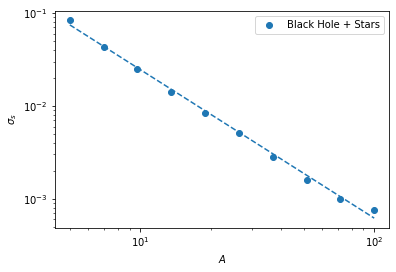

In [5]:
plt.scatter(threshold, sigmaA,label="Black Hole + Stars")

plt.plot(threshold, 0.98*threshold**(-1.60),ls="--")


plt.ylabel("$\sigma_s$")
plt.xlabel("$A$")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [21]:
popt

array([ 0.98234111, -1.60519726])

$$ A < A_c \rightarrow K_A < K_c - K_0$$

$$N = \int_{A_c}^\infty .. + \int_A^{A_c} ...$$

The first term is just plugging in $A=A_c$ in the second(simple) expression. Let's look at the second term

In the second term, when $A'$ rummages through $A$ to $A_c$, we always have $A' < A_c$, therefore $K_0 + K_A' < K_c $

$$\int_{-\infty}^{K_0} b \ln 10 \times 10^{b(K+K_{A'})} dK$$

$$\int_{-\infty}^{K_0+K_{A'}} b \ln 10 \times 10^{bX} dX$$

$$\int_{-\infty}^{K_0}|d\Sigma_s/dK|_{K+K_{A'}}dK = 10^{b(K_0+K_{A'})}$$

instead of an universal $10^{bK_c}$ when $K_0+K_A'> K_c$ (that's when you only integrate to the cutoff magnitude)



$$|d\sigma_s/dA|_{A'} = a A'^{-a-1}$$

If $A'>A_c, K_0 + K_{A'} > K_c$, $$\int_{-\infty}^{K_0}\left|d \Sigma_s / d K\right|_{K+K_{A^{\prime}}} d K = 10^{b K_c}$$

If $A'<A_c, K_0 + K_{A'} < K_c$, $$\int_{-\infty}^{K_0}\left|d \Sigma_s / d K\right|_{K+K_{A^{\prime}}} d K = 10^{b (K_{A'}+ K_0)}$$

If $A > A_c$, then $A'$ is ALWAYS larger than $A_c$

$$\Sigma \sigma \int_{A}^{\infty} 10^{b K_c} |d\sigma_s/dA|_{A'} dA' = \Sigma \sigma A^{-a} 10^{b K_c}$$

if $A< A_c$, then $A'$ is SOMETIMES larger and SOMETIMES smaller than $A_c$ 

$$\int_{A}^{A_c} \Sigma \sigma a A'^{-a-1} 10^{b (K_{A'}+K_0)} dA' + \int_{A_c}^{\infty} \Sigma \sigma a A'^{-a-1} 10^{b K_c} dA'$$

note that

$$10^{b(K_0+K_{A'})} = A'^{2.5b}10^{bK_0}$$


therefore the second term is $$\Sigma \sigma \int_{A}^{A_c}10^{bK_0} a A'^{2.5b-a-1} dA'$$

which is 

$$\Sigma \sigma a 10^{bK_0} \int_{A}^{A_c}  \dfrac{d\dfrac{A'^{2.5b-a}}{2.5b-a}}{dA'} dA'$$

In [22]:
a = 1.6

hat_Sigma_S = 1e-10

hat_sigma_S = 0.98

N_0 = hat_Sigma_S*hat_sigma_S

b = 0.4

K_c = 28





#normalization for N

def N_A_K_0(A, K_0):
    
    A_c = 10**(b*(K_c-K_0))
    
    if (A > A_c):
        
        return N_0*10**(b*K_c)*A**(-a)
    
    else:
               
        return N_0*(10**(b*K_c)*A_c**(-a) + a/(a-2.5*b)*10**(b*K_0)*(A**(2.5*b-a)-A_c**(2.5*b-a)))
        
    

Text(0, 0.5, '$P(>A, K_0)$')

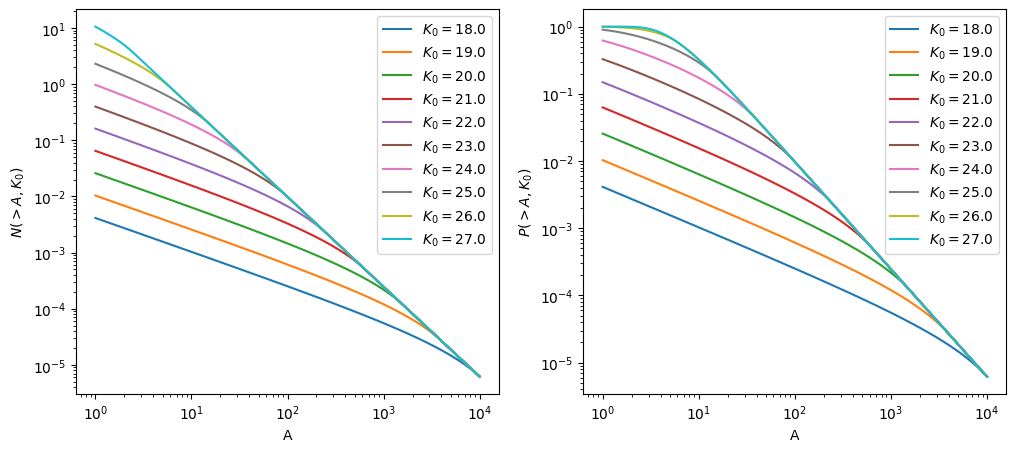

In [25]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)


A_array = np.logspace(0, 4, 100)

K_0_array = np.linspace(18, 27, 10)

for K_00 in K_0_array: 
    
    N_list = []
    
    for A_prime in A_array:
        
        N_list.append(N_A_K_0(A_prime, K_00))
    
    plt.plot(A_array, N_list, label="$K_0 = $"+str(K_00))
    
    A_c = 10**(b*(K_c-K_00))

    #plt.axvline(x = A_c, linestyle = ":")
    
plt.legend()
        
plt.xscale("log")

plt.yscale("log")

plt.xlabel("A")

plt.ylabel("$N(>A, K_0)$")

#plt.axis(xmax=100)


plt.subplot(1,2,2)

A_array = np.logspace(0, 4, 100)

K_0_array = np.linspace(18, 27, 10)

for K_00 in K_0_array:
    
    P_list = []
    
    for A_prime in A_array:
        
        P_list.append(1-np.exp(-N_A_K_0(A_prime, K_00)))
    
    P_list = np.array(P_list)
    
    plt.plot(A_array, P_list, label="$K_0 = $"+str(K_00))
    
    A_c = 10**(b*(K_c-K_00))

    #plt.axvline(x = A_c, linestyle = ":")
    
plt.legend()
        
plt.xscale("log")

plt.yscale("log")

plt.xlabel("A")

plt.ylabel("$P(>A, K_0)$")



A Poisson distribution basically means if, within some time/distance/area, the expected occurence # of an event is $N$, then the probability of it actually occuring $n$ times is

$$P(n; N) = \dfrac{N^{n}}{n!} e^{-N}$$


Note that $n = 0, 1, 2 ....N, N+1, .....\infty$ is any possible integer, discontinous, and one can verify $\sum_n P(n) = 1$ through Taylor expansion

To derive this equation, let's assume that we are progressing/scanning $x$ across some timeline/distance/area pretty uniformly, just ALWAYS WAITING/MONITORING for some event to happen. When we have traversed from 0 to a total time/space of $x$, we expect $N$ events. But during each small scanning interval $\delta x$, the expected number is going to be $N\delta x/x :=\lambda \delta x$

Therefore during every small interval, the probability for one event to happen is $\lambda \delta x$, otherwise $1 - \lambda \delta x$. 

Of course if $N \ll 1$ itself is extremely small, then the probability of happening two events within the entire $x$ is going to be negligible compared to that of 0 or 1 event anyway, and one can simply write down:

$$P(n\geq 1) \approx P(n = 1) = \lambda x = N$$


For example, FLOOD EVERY 100 YEARS is expected to happen once every 100 years, and $N=1/100$ during each year. The probability of it happening in 2023 must be (by common sense) 0.01.


To get a general/accurate expression for $P(0)$, the interval can always be sufficiently small such that its' impossible for more than one event to happen

$$P(0)_{x'+\delta x}=P(0)_{x'}(1-\lambda \delta x)$$

Written in derivative form

$$\frac{d P(0)}{d x}=-\lambda P(0)$$

Which gives 

$$P(0) = e^{- \lambda x} = e^{-N}$$

And that the accurate counter probability of happening $\geq 1$ event is $P(n\geq 1) = 1- P(0) = 1-e^{-N}$

Easier way to derive:

$$\lim_{x/\delta x \rightarrow \infty}(1-\lambda \delta x)^{x/\delta x} = e^{-N}$$

For $n$ events to happen during $x'+\delta x$, we add the probability of $P(n)_{x'}$ and "not-happening" during $\delta x$, as well as probability of $P(n-1)_{x'}$ and "happening-once" during $\delta x$.

$$P(n)_{x'+\delta x}=P(n)_{x'}(1-\lambda \delta x) + P(n-1)_{x'} \lambda \delta x$$

$$\frac{d P(n)}{d t}+\lambda P(n)=\lambda P(n-1)$$

Which means we can always get $P(n)$ from $P(n-1)$.

For example, FLOOD EVERY 100 YEARSis expected to happen once every 100 years. The probability of it happening in 21th century is NOT 1. Rather, there is some possibility of it not happening at all, or happening many times.



e.g. happening once: $P(1) = 1 e^{-1} = 0.368$

happening not at all is $P(0) = 1e^{-1} = 0.368$

Note that 

In [92]:
0.99**(100)

0.3660323412732292

In [93]:
0.999**(1000)

0.36769542477096373

In [94]:
0.9999**(10000)

0.36786104643297046

What does that mean?

Clarification about the unit system


Independence of mass: derivation 1

amplification: derivation 2


*******************

Now that we have established a fiducial model, what else can we change?

1. bg star model? 

2. central density model? 

3. Source-lens distance/Einstein radius (Dependence can be explained)

Look up thresholds for JWST; Compare with AL01

Comparison: Higher surface density, but farther away from center so cross section is similar. Other factors are similar to order unity. one thing worth doing is try changing the lens-source distance.

The dominating factor is the rise of detection threshold. Which means they will detect events at very probable rates.

Read about the telescopes.